In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') # ignores annoying warnings

In [3]:
EruptionData = pd.read_csv('../Datasets/EruptionData.csv')
EruptionData.tail()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Longitude,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting
9788,241080,Tongariro,14555,Confirmed Eruption,NaN,NaN,NaN,?,-9850,NaN,...,175.632,New Zealand,Stratovolcano(es),Eruption Observed,2012 CE,New Zealand to Fiji,New Zealand,1978,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
9789,327812,Red Hill,22193,Confirmed Eruption,Cerro Pomo?,NaN,NaN,NaN,-9850,500.0,...,-108.830,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
9790,213020,Nemrut Dagi,13908,Confirmed Eruption,NaN,NaN,NaN,NaN,-9950,150.0,...,42.229,Turkey,Stratovolcano,Eruption Observed,1650 CE,Mediterranean and Western Asia,Turkey,2948,Rhyolite,Intraplate / Continental crust (>25 km)
9791,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,NaN,NaN,-10060,NaN,...,-113.500,United States,Pyroclastic cone(s),Eruption Dated,130 BCE,Canada and Western USA,USA (Idaho),2005,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
9792,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,NaN,NaN,-10450,4800.0,...,31.933,Tanzania,Pyroclastic cone(s),Eruption Dated,10450 BCE,Africa and Red Sea,Africa (eastern),1146,Foidite,Rift zone / Continental crust (>25 km)


In [4]:
print('Number of eruptions:', len(EruptionData))
EruptionData['number of eruptions'] = ""
EruptionData.tail()

Number of eruptions: 9793


,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting,number of eruptions
9788,241080,Tongariro,14555,Confirmed Eruption,NaN,NaN,NaN,?,-9850,NaN,...,New Zealand,Stratovolcano(es),Eruption Observed,2012 CE,New Zealand to Fiji,New Zealand,1978,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
9789,327812,Red Hill,22193,Confirmed Eruption,Cerro Pomo?,NaN,NaN,NaN,-9850,500.0,...,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),
9790,213020,Nemrut Dagi,13908,Confirmed Eruption,NaN,NaN,NaN,NaN,-9950,150.0,...,Turkey,Stratovolcano,Eruption Observed,1650 CE,Mediterranean and Western Asia,Turkey,2948,Rhyolite,Intraplate / Continental crust (>25 km),
9791,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,NaN,NaN,-10060,NaN,...,United States,Pyroclastic cone(s),Eruption Dated,130 BCE,Canada and Western USA,USA (Idaho),2005,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),
9792,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,NaN,NaN,-10450,4800.0,...,Tanzania,Pyroclastic cone(s),Eruption Dated,10450 BCE,Africa and Red Sea,Africa (eastern),1146,Foidite,Rift zone / Continental crust (>25 km),


In [5]:
volcano_names = EruptionData['Volcano Name'].unique()
volcano_names

array(['Planchon-Peteroa', 'Copahue', 'Karangetang', 'Kuchinoerabujima',
       'Gamalama', 'Soputan', 'Barren Island', 'Ulawun', 'Ketoi',
       'Sarychev Peak', 'Semisopochnoi', 'Veniaminof', 'Alaid', 'Sangay',
       'Rincon de la Vieja', 'Nishinoshima', 'Negra, Sierra', 'Telica',
       'Krakatau', 'Fernandina', 'Great Sitkin', 'Kerinci', 'Merapi',
       'Karymsky', 'Marapi', 'San Cristobal', 'Fournaise, Piton de la',
       'Dieng Volcanic Complex', 'Kirishimayama', 'Kusatsu-Shiranesan',
       'San Miguel', 'Mayon', 'Kadovar', 'Kanlaon', 'Agung', 'Dempo',
       'Tinakula', 'Ambae', 'Sangeang Api', 'Bulusan', 'Poas',
       'Lengai, Ol Doinyo', "Kick 'em Jenny", 'Aira', 'Kambalny',
       'Unnamed', 'Bogoslof', 'Chirinkotan', 'Nyamuragira', 'Zhupanovsky',
       'Sabancaya', 'Ebeko', 'Asosan', 'Saunders', 'Ubinas',
       'White Island', 'Rinjani', 'Chikurachki', 'Bristol Island',
       'Cleveland', 'Langila', 'Zavodovski', 'Pavlof',
       'Chillan, Nevados de', 'Momotombo', '

In [6]:
volc_name_df = pd.DataFrame()

for name in volcano_names:
    volc_rows = EruptionData[EruptionData['Volcano Name'] == name]
    volc_name_df = pd.concat([volc_name_df, volc_rows], ignore_index=True)
    total_eruptions = len(volc_name_df.loc[volc_name_df['Volcano Name'] == 'Tongariro'])
    EruptionData.loc[EruptionData['Volcano Name'] == name, 'number of eruptions'] = total_eruptions

volc_name_df

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting,number of eruptions
0,357040,Planchon-Peteroa,22297,Confirmed Eruption,NaN,NaN,NaN,NaN,2018,NaN,...,Chile,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,3977,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
1,357040,Planchon-Peteroa,20808,Confirmed Eruption,Peteroa,3.0,NaN,NaN,2011,NaN,...,Chile,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,3977,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
2,357040,Planchon-Peteroa,11947,Confirmed Eruption,Peteroa,2.0,NaN,NaN,2010,NaN,...,Chile,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,3977,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
3,357040,Planchon-Peteroa,11946,Confirmed Eruption,NaN,1.0,NaN,NaN,1998,NaN,...,Chile,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,3977,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
4,357040,Planchon-Peteroa,11945,Confirmed Eruption,Peteroa,2.0,NaN,NaN,1991,NaN,...,Chile,Stratovolcano(es),Eruption Observed,2018 CE,South America,Central Chile and Argentina,3977,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,327812,Red Hill,22196,Confirmed Eruption,Zuni Salt Lake maar,NaN,NaN,NaN,-9450,400.0,...,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),
9789,327812,Red Hill,22194,Confirmed Eruption,2.5 km radius of Zuni Salt Lake,NaN,NaN,NaN,-9700,450.0,...,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),
9790,327812,Red Hill,22193,Confirmed Eruption,Cerro Pomo?,NaN,NaN,NaN,-9850,500.0,...,United States,Volcanic field,Eruption Dated,9450 BCE,Canada and Western USA,USA (New Mexico),2300,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),
9791,283141,Nantaisan,17850,Confirmed Eruption,NaN,NaN,NaN,NaN,-9540,500.0,...,Japan,Stratovolcano,Eruption Dated,9540 BCE,"Japan, Taiwan, Marianas",Honshu,2486,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),


In [8]:
most_splosions = EruptionData.sort_values(by='number of eruptions', ascending=False).head(1)
most_splosions

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting,number of eruptions
9792,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,NaN,NaN,-10450,4800.0,...,Tanzania,Pyroclastic cone(s),Eruption Dated,10450 BCE,Africa and Red Sea,Africa (eastern),1146,Foidite,Rift zone / Continental crust (>25 km),76


In [10]:
most_VEI = EruptionData.sort_values(by='VEI', ascending=False)
most_VEI[0:10]


,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting,number of eruptions
5190,264040,Tambora,16231,Confirmed Eruption,NaN,7.0,NaN,NaN,1812,NaN,...,Indonesia,Stratovolcano,Eruption Observed,1967 CE,Indonesia,Lesser Sunda Islands,2850,Trachybasalt / Tephrite Basanite,Subduction zone / Continental crust (>25 km),76
8947,282060,Kikai,16980,Confirmed Eruption,Kikai caldera,7.0,NaN,?,-4350,NaN,...,Japan,Caldera,Eruption Observed,2013 CE,"Japan, Taiwan, Marianas",Ryukyu Islands and Kyushu,704,Rhyolite,Subduction zone / Oceanic crust (< 15 km),0
6912,305060,Changbaishan,19644,Confirmed Eruption,NaN,7.0,?,NaN,942,4.0,...,China-North Korea,Stratovolcano,Eruption Observed,1903 CE,Kamchatka and Mainland Asia,China (eastern),2744,Trachyte / Trachydacite,Intraplate / Continental crust (>25 km),76
6655,264030,Rinjani,20843,Confirmed Eruption,Samalas,7.0,?,NaN,1257,NaN,...,Indonesia,Stratovolcano,Eruption Observed,2016 CE,Indonesia,Lesser Sunda Islands,3726,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),0
9420,300023,Kurile Lake,18903,Confirmed Eruption,NaN,7.0,NaN,NaN,-6440,25.0,...,Russia,Caldera,Eruption Dated,6440 BCE,Kamchatka and Mainland Asia,Kamchatka Peninsula,81,Dacite,Subduction zone / Continental crust (>25 km),76
8461,355210,"Blanco, Cerro",20904,Confirmed Eruption,NaN,7.0,NaN,NaN,-2300,160.0,...,Argentina,Caldera,Eruption Dated,2300 BCE,South America,"Northern Chile, Bolivia and Argentina",4670,Rhyolite,Subduction zone / Continental crust (>25 km),76
8212,212040,Santorini,13879,Confirmed Eruption,NaN,7.0,?,NaN,-1610,14.0,...,Greece,Shield(s),Eruption Observed,1950 CE,Mediterranean and Western Asia,Greece,367,Dacite,Subduction zone / Continental crust (>25 km),76
9252,322160,Crater Lake,20610,Confirmed Eruption,Mt. Mazama summit and flank vents,7.0,NaN,NaN,-5680,150.0,...,United States,Caldera,Eruption Dated,2850 BCE,Canada and Western USA,USA (Oregon),2487,Dacite,Subduction zone / Continental crust (>25 km),76
6397,373030,Bardarbunga,12865,Confirmed Eruption,Veidivötn (Veidivatnahraun),6.0,NaN,NaN,1477,NaN,...,Iceland,Stratovolcano,Eruption Observed,2015 CE,Iceland and Arctic Ocean,Iceland (northeastern),2000,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km),0
9222,285081,Mashu,18708,Confirmed Eruption,NaN,6.0,NaN,NaN,-5550,100.0,...,Japan,Caldera,Eruption Dated,1080 CE,"Japan, Taiwan, Marianas",Hokkaido,857,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),76


In [68]:
EruptionData = EruptionData.dropna(subset=['VEI'])
start_year = EruptionData['Start Year']
vei = EruptionData['VEI']
print(start_year)
print(vei)

9        2018
11       2018
12       2018
13       2018
14       2018
        ...  
9780    -9500
9781    -9500
9784    -9650
9791   -10060
9792   -10450
Name: Start Year, Length: 7620, dtype: int64
9       2.0
11      1.0
12      1.0
13      2.0
14      1.0
       ... 
9780    4.0
9781    0.0
9784    5.0
9791    0.0
9792    1.0
Name: VEI, Length: 7620, dtype: float64


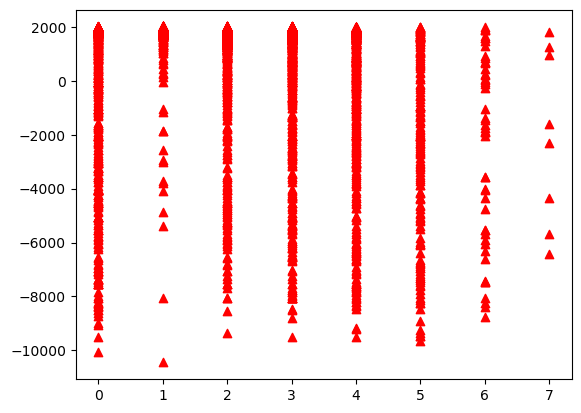

In [74]:
plt.scatter(vei, start_year, marker = '^', color = 'r')

In [14]:
newIndexValues = list(range(len(EruptionData)))

EurptionDataByElavation = EruptionData.sort_values(by='Elevation (m)', ascending=False).set_index([newIndexValues])
EurptionDataByElavation

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Elevation (m),Dominant Rock Type,Tectonic Setting,number of eruptions
0,355130,"Ojos del Salado, Nevados",11882,Confirmed Eruption,NaN,NaN,NaN,NaN,750,250.0,...,Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",6879,Dacite,Subduction zone / Continental crust (>25 km),76
1,355110,Llullaillaco,11880,Confirmed Eruption,NaN,0.0,NaN,NaN,1868,NaN,...,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",6739,Dacite,Subduction zone / Continental crust (>25 km),76
2,355110,Llullaillaco,11879,Confirmed Eruption,NaN,2.0,NaN,NaN,1854,NaN,...,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",6739,Dacite,Subduction zone / Continental crust (>25 km),76
3,355110,Llullaillaco,11881,Confirmed Eruption,NaN,2.0,NaN,NaN,1877,NaN,...,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",6739,Dacite,Subduction zone / Continental crust (>25 km),76
4,355012,Parinacota,11811,Confirmed Eruption,South flank (lower Volcanes de Ajata),NaN,NaN,NaN,-4320,1200.0,...,Chile-Bolivia,Stratovolcano,Eruption Dated,290 CE,South America,"Northern Chile, Bolivia and Argentina",6336,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,331031,North Gorda Ridge Segment,20721,Confirmed Eruption,NaN,0.0,NaN,?,-3020,NaN,...,Undersea Features,Submarine,Eruption Observed,1996 CE,Hawaii and Pacific Ocean,Pacific Ocean (northern),-3000,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km),76
9789,331031,North Gorda Ridge Segment,20720,Confirmed Eruption,NaN,0.0,NaN,?,-4840,NaN,...,Undersea Features,Submarine,Eruption Observed,1996 CE,Hawaii and Pacific Ocean,Pacific Ocean (northern),-3000,Basalt / Picro-Basalt,Rift zone / Oceanic crust (< 15 km),76
9790,377020,East Gakkel Ridge at 85°E,12976,Confirmed Eruption,East Gakkel Ridge,2.0,NaN,NaN,1999,NaN,...,Undersea Features,Submarine,Evidence Credible,1999 CE,Iceland and Arctic Ocean,Arctic Ocean,-3800,No Data (checked),Rift zone / Oceanic crust (< 15 km),76
9791,284305,Mariana Back-Arc Segment at 15.5°N,21102,Confirmed Eruption,Along a 10 km N-S line at 15.4°N,0.0,NaN,>,2013,NaN,...,United States,Submarine,Eruption Dated,2015 CE,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",-4100,NaN,Subduction zone / Oceanic crust (< 15 km),0


In [67]:
import math
tect_setting_and_rock_type = EurptionDataByElavation.groupby('Tectonic Setting', as_index = False)['Dominant Rock Type'].describe()
intraplate = tect_setting_and_rock_type.loc[tect_setting_and_rock_type['Tectonic Setting'] == 'Intraplate / Oceanic crust (< 15 km)']

percent = intraplate['freq']/intraplate['count']
print(round(float(percent),2))



0.86


In [17]:
EurptionDataByElavation.groupby('Volcano Name')['number of eruptions'].describe()

,count,unique,top,freq
Volcano Name,,,,
Abu,1,1,76,1
Acatenango,8,1,76,8
Acigol-Nevsehir,5,1,76,5
Adams,15,1,76,15
Adams Seamount,4,1,76,4
...,...,...,...,...
Zheltovsky,4,1,76,4
Zhupanovsky,15,1,0,15
Zitacuaro-Valle de Bravo,1,1,76,1
